<a href="https://colab.research.google.com/github/tamaappp/SPK_G.231.22.0025/blob/main/fuzzyspk_G_231_22_0025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy --upgrade

#!pip install scikit-fuzzy==0.4.2

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card (2).csv


In [ ]:
base = pd.read_csv('UCI_Credit_Card.csv', header=1, names=columns)

base.shape


(29999, 25)

In [ ]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [ ]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,BILL_TOTAL
0,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
1,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
2,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
3,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0
4,6,50000.0,1,1,2,37,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,238114.0


In [ ]:
X = base.iloc[:,[1,25]].values

In [ ]:
X

array([[120000.,  17077.],
       [ 90000., 101653.],
       [ 50000., 231334.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[-0.36602017, -0.66601469],
       [-0.59724319, -0.44318903],
       [-0.90554055, -0.10152881],
       ...,
       [-1.05968923, -0.5252759 ],
       [-0.67431753, -0.00858731],
       [-0.90554055, -0.10274074]])

In [ ]:
X.shape

(29999, 2)

In [ ]:
X.T.shape

(2, 29999)

In [ ]:
r = fuzz.cluster.cmeans(data = X.T, c = 3, m = 2, error=0.005, maxiter=1000, init=None)

In [ ]:
r

(array([[ 0.74997608,  2.01660947],
        [-0.73894689, -0.30169695],
        [ 0.97503236, -0.42057433]]),
 array([[0.02732163, 0.00499173, 0.00912822, ..., 0.01491717, 0.01405198,
         0.00905847],
        [0.8485854 , 0.97912878, 0.97273938, ..., 0.95009542, 0.956143  ,
         0.97293109],
        [0.12409297, 0.01587949, 0.01813239, ..., 0.03498741, 0.02980502,
         0.01801044]]),
 array([[0.365728  , 0.23958597, 0.50937303, ..., 0.30338918, 0.25902653,
         0.02737093],
        [0.30610014, 0.42750005, 0.06564158, ..., 0.44361183, 0.02165295,
         0.87531845],
        [0.32817186, 0.33291399, 0.4249854 , ..., 0.25299899, 0.71932052,
         0.09731062]]),
 array([[2.90549824, 2.8045692 , 2.6883536 , ..., 3.12026758, 2.4758906 ,
         2.68930858],
        [0.52134609, 0.20024971, 0.26042414, ..., 0.39097724, 0.30015032,
         0.25949378],
        [1.36332786, 1.57243818, 1.9074445 , ..., 2.03741365, 1.70002599,
         1.90724216]]),
 array([25772.035151

In [ ]:
previsoes_porcentagem = r[1]

In [ ]:
previsoes_porcentagem.shape

(3, 29999)

In [ ]:
previsoes_porcentagem

array([[0.02732163, 0.00499173, 0.00912822, ..., 0.01491717, 0.01405198,
        0.00905847],
       [0.8485854 , 0.97912878, 0.97273938, ..., 0.95009542, 0.956143  ,
        0.97293109],
       [0.12409297, 0.01587949, 0.01813239, ..., 0.03498741, 0.02980502,
        0.01801044]])

In [ ]:
previsoes_porcentagem[0][0]

np.float64(0.027321627757695605)

In [ ]:
previsoes_porcentagem[1][0]

np.float64(0.8485854012620075)

In [ ]:
previsoes_porcentagem[2][0]

np.float64(0.12409297098029673)

In [ ]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

np.float64(0.9999999999999999)

In [ ]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [ ]:
previsoes

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
previsoes[5000]

np.int64(2)

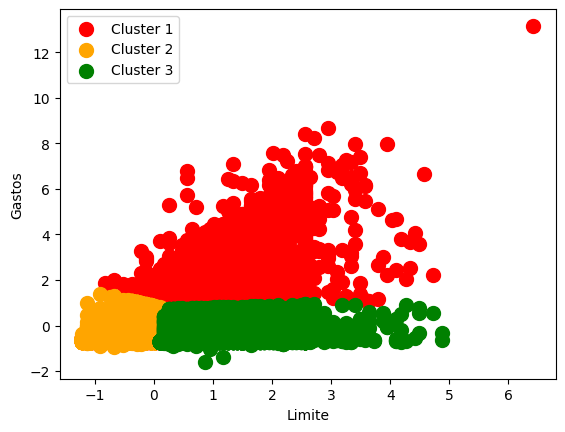

In [ ]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()
